In [4]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.core.topologyobjects import Dihedral
import matplotlib.pyplot as plt

In [5]:
Z= '1_curved15_45A'
#Z= '2_scratch15_30A'
#Z= '3_bound15_15A'
#Z= '4_tandem_30A'
#Z= '5_tandem_15A'
#Z= '6_tandem_CT2_30A'
#Z= '7_tandem_ex_CT2_30A'

u1 = mda.Universe(f'{Z}/N1/traj_continuous_v1_400_reduced.pdb', f'{Z}/N1/traj_continuous_v1_400_reduced.xtc')
u2 = mda.Universe(f'{Z}/N2/traj_continuous_v1_400_reduced.pdb', f'{Z}/N2/traj_continuous_v1_400_reduced.xtc')
u3 = mda.Universe(f'{Z}/N3/traj_continuous_v1_400_reduced.pdb', f'{Z}/N3/traj_continuous_v1_400_reduced.xtc')
u4 = mda.Universe(f'{Z}/N4/traj_continuous_v1_400_reduced.pdb', f'{Z}/N4/traj_continuous_v1_400_reduced.xtc')


In [6]:
ca = u1.select_atoms('name CA')[34:68]

CA_inds = ca.indices
CA_res = ca.residues

D = [Dihedral(CA_inds[i:i+4], u1) for i in range(len(ca)-3)]
print(len(ca))


34


In [7]:
Dihed = []
for j in [u1,u2,u3,u4]:
   for ts in j.trajectory[-2000:-1:10]:    #last 500
       Dihed.append([i.dihedral() for i in D])
Dihed = np.array(Dihed)
np.shape(Dihed)

(800, 31)

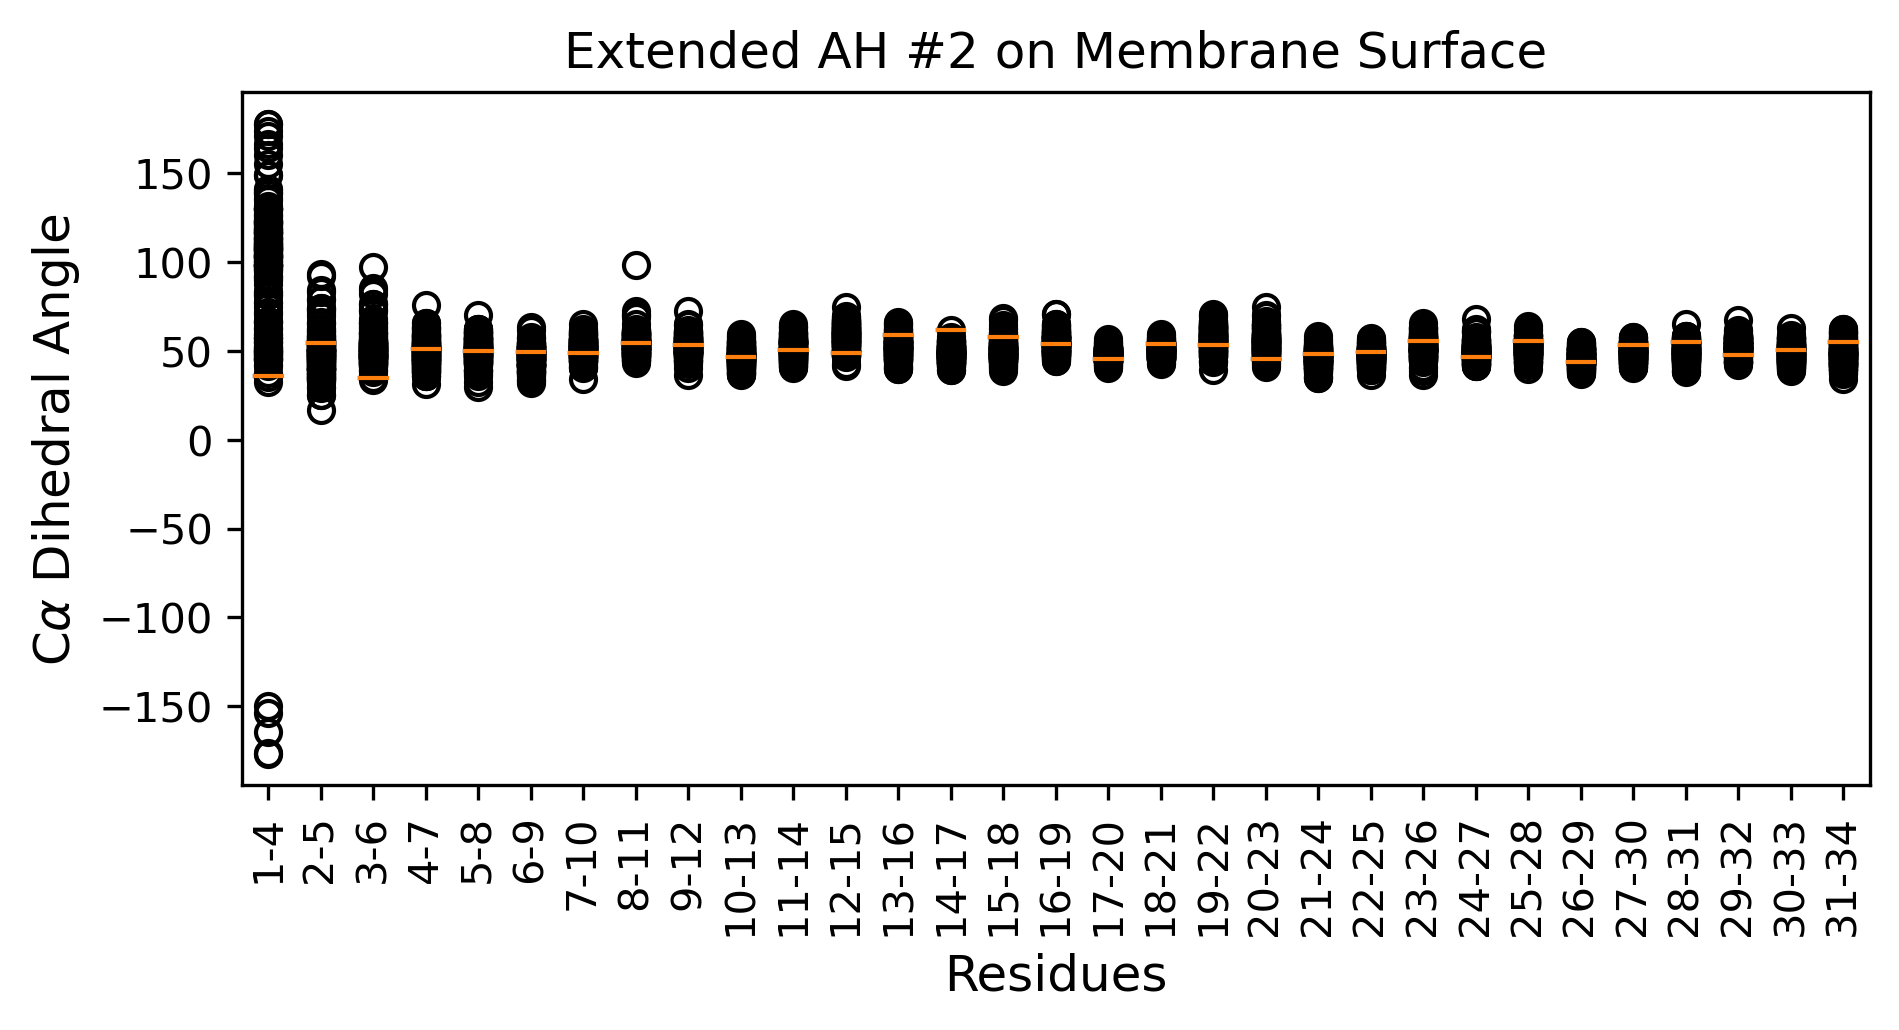

In [36]:
Positions = ca.resids.astype(str)
Xlabels = ['-'.join(Positions[i:i+4:3]) for i in range(len(ca)-3)]
Data_dict = {i:j for i,j in zip(Xlabels, np.transpose(Dihed))}
fig, ax = plt.subplots(figsize=(7,3),dpi=300)
ax.boxplot(Data_dict.values())
ax.set_xticklabels(Data_dict.keys(), rotation=90)

plt.ylabel('C$\\alpha$ Dihedral Angle',fontsize=12)
plt.xlabel('Residues', fontsize=12)
plt.title('Extended AH #2 on Membrane Surface', fontsize=12)
#plt.title('Extended AH in Solution, presence of bound AH', fontsize=12)
#plt.title('Tandem AH on Membrane Surface', fontsize=12)
#plt.title('Tandem Extended AH in Solution, charged C-term', fontsize=12)

plt.savefig(f'Dihedral_{Z}_all_2nd.png',bbox_inches="tight")
plt.savefig('destination_path.eps', format='eps')

In [11]:
plt.savefig(f'Dihedral_{Z}_all.png',bbox_inches="tight")

<Figure size 640x480 with 0 Axes>